I think that my simulated AB samples didn't actually ahve any assembly bias in them. I'm gonna recreate the populating procedure to test that. 

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import h5py
from chainconsumer import ChainConsumer
#from corner import corner
from ast import literal_eval
from pearce.emulator import LemonPepperWet
from os import path
from scipy.linalg import inv

 /u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


In [3]:
fname = '/u/ki/swmclau2/des/PearceMCMC/CAB_HOD_fixed_cosmo_lsd_wp_ds_rmin_None_CAB.hdf5'

In [4]:
f = h5py.File(fname, 'r')

In [5]:
f.attrs.keys()

[u'chain_fixed_params',
 u'cov',
 u'dlogz',
 u'emu_cov_fname',
 u'emu_hps',
 u'emu_type',
 u'fixed_params',
 u'mcmc_type',
 u'nburn',
 u'nlive',
 u'nsteps',
 u'nwalkers',
 u'obs',
 u'param_names',
 u'seed',
 u'sim',
 u'training_file']

In [6]:
sim_cfg = eval(f.attrs['sim'])

In [7]:
from pearce.mocks import cat_dict

In [8]:
#cat = cat_dict[sim_cfg['simname']](**sim_cfg['sim_hps'])#construct the specified catalog!
cat = cat_dict[sim_cfg['simname']](boxno=3, realization=4)#construct the specified catalog!

In [9]:
sim_cfg

{'cosmo_params': {'H0': 65.7317,
  'Neff': 3.2,
  'ns': 0.971515,
  'ombh2': 0.022762900000000003,
  'omch2': 0.11283,
  'sigma8': 0.7542319000000001,
  'w0': -0.861513},
 'gal_type': 'HOD',
 'hod_name': 'hsabZheng07',
 'hod_params': {'alpha': 1.083,
  'conc_gal_bias': 1.0,
  'logM0': 13.2,
  'logM1': 14.2,
  'logMmin': 13.06167443892987,
  'mean_occupation_centrals_assembias_param1': 1.0,
  'mean_occupation_satellites_assembias_param1': -1.0,
  'sigma_logM': 0.2},
 'min_ptcl': 100,
 'nd': '5e-4',
 'scale_factor': 1.0,
 'sim_hps': {'boxno': 1,
  'downsample_factor': 0.01,
  'particles': True,
  'realization': 1,
  'sec_haloprop_key': 'halo_local_density_10',
  'system': 'ki-ls'},
 'simname': 'testbox'}

In [10]:
cat.load(sim_cfg['scale_factor'], HOD='corrZheng07',\
         hod_kwargs={'sec_haloprop_key':'halo_nfw_conc'})

 /u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/cached_halo_catalog.py:567: H5pyDeprecationWarning:The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


In [11]:
cat.populate(sim_cfg['hod_params'])

 /u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/halo_table_cache_log_entry.py:404: H5pyDeprecationWarning:The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/sim_manager/halo_table_cache_log_entry.py:221: H5pyDeprecationWarning:The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for det

In [12]:
cat.model.param_dict

{'alpha': 1.083,
 'conc_gal_bias': 1.0,
 'logM0': 13.2,
 'logM1': 14.2,
 'logMmin': 13.06167443892987,
 'mean_occupation_centrals_assembias_corr1': 0.5,
 'mean_occupation_centrals_assembias_param1': 1.0,
 'mean_occupation_satellites_assembias_corr1': 0.5,
 'mean_occupation_satellites_assembias_param1': -1.0,
 'sigma_logM': 0.2}

In [13]:
cat.model.param_dict['mean_occupation_centrals_assembias_param1'] = 0.6
cat.model.param_dict['mean_occupation_satellites_assembias_param1'] = -0.3

In [14]:
cat.model.model_dictionary['centrals_occupation'].__dict__

{'_assembias_strength_abscissa': [2],
 '_attrs_to_inherit': ['threshold'],
 '_galprop_dtypes_to_allocate': dtype([('halo_num_centrals', '<i4')]),
 '_loginterp': True,
 '_lower_occupation_bound': 0.0,
 '_method_name_to_decorate': 'mean_occupation',
 '_methods_to_inherit': ['mc_occupation',
  'mean_occupation',
  'assembias_strength'],
 '_mock_generation_calling_sequence': ['mc_occupation'],
 '_split_abscissa': [2],
 '_split_ordinates': [0.5],
 '_upper_occupation_bound': 1.0,
 'baseline_mean_occupation': <bound method CorrAssembiasZheng07Cens.mean_occupation of <pearce.mocks.customHODModels.CorrAssembiasZheng07Cens object at 0x7f159cab3310>>,
 'feature_name': 'occupation',
 'gal_type': 'centrals',
 'lower_bound_mean_occupation_centrals': 0.0,
 'mean_occupation': <function halotools.empirical_models.occupation_models.zheng07_components.mean_occupation>,
 'param_dict': {'logMmin': 13.06167443892987,
  'mean_occupation_centrals_assembias_corr1': 0.5,
  'sigma_logM': 0.2},
 'prim_haloprop_ke

In [15]:
r_bins = np.logspace(-1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [16]:
wp0 = cat.calc_wp(r_bins)

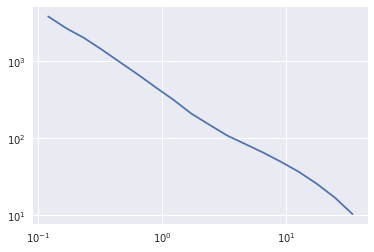

In [17]:
plt.plot(rbc, wp0)
plt.loglog();

In [18]:
cat.model.model_dictionary['centrals_occupation'].__dict__

{'_assembias_strength_abscissa': [2],
 '_attrs_to_inherit': ['threshold'],
 '_galprop_dtypes_to_allocate': dtype([('halo_num_centrals', '<i4')]),
 '_loginterp': True,
 '_lower_occupation_bound': 0.0,
 '_method_name_to_decorate': 'mean_occupation',
 '_methods_to_inherit': ['mc_occupation',
  'mean_occupation',
  'assembias_strength'],
 '_mock_generation_calling_sequence': ['mc_occupation'],
 '_split_abscissa': [2],
 '_split_ordinates': [0.5],
 '_upper_occupation_bound': 1.0,
 'baseline_mean_occupation': <bound method CorrAssembiasZheng07Cens.mean_occupation of <pearce.mocks.customHODModels.CorrAssembiasZheng07Cens object at 0x7f159cab3310>>,
 'feature_name': 'occupation',
 'gal_type': 'centrals',
 'lower_bound_mean_occupation_centrals': 0.0,
 'mean_occupation': <function halotools.empirical_models.occupation_models.zheng07_components.mean_occupation>,
 'param_dict': {'logMmin': 13.06167443892987,
  'mean_occupation_centrals_assembias_corr1': 0.5,
  'sigma_logM': 0.2},
 'prim_haloprop_ke

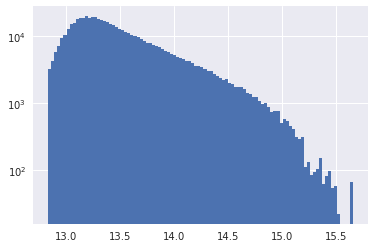

In [19]:
plt.hist(np.log10(cat.model.mock.galaxy_table['halo_mvir']), bins=100);
plt.yscale('log')

In [20]:
np.log10(np.min(cat.model.mock.galaxy_table['halo_mvir']))

12.832643

In [21]:
mass_bin_range=(11, 16)
mass_bin_size=0.01

In [22]:
mass_bins = np.logspace(mass_bin_range[0], mass_bin_range[1],
                   int((mass_bin_range[1] - mass_bin_range[0]) / mass_bin_size) + 1)
mass_bin_centers = (mass_bins[:-1] + mass_bins[1:]) / 2

In [23]:
hod = cat.calc_hod(mass_bin_range=mass_bin_range)

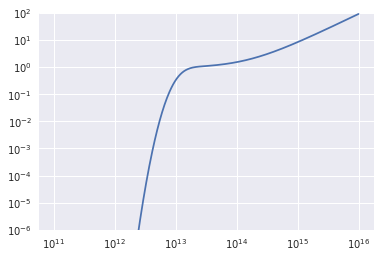

In [24]:
plt.plot(mass_bin_centers, hod)
plt.ylim([1e-6, 1e2])
plt.loglog();

In [25]:
from halotools.mock_observables import hod_from_mock
from halotools.utils.table_utils import compute_conditional_percentiles
from halotools.mock_observables import hod_from_mock, get_haloprop_of_galaxies

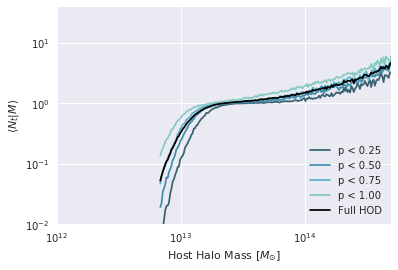

In [26]:
n_splits = 4
catalog = cat.model.mock.galaxy_table
sec_percentiles = compute_conditional_percentiles(prim_haloprop = cat.model.mock.halo_table['halo_mvir'],\
                                              sec_haloprop = cat.model.mock.halo_table['halo_nfw_conc'],
                                          prim_haloprop_bin_boundaries= mass_bins)

sec_gal_percentiles = get_haloprop_of_galaxies(catalog['halo_id'], cat.model.mock.halo_table['halo_id'],
                                           sec_percentiles)

# TODO bins here
hods = np.zeros((n_splits, len(mass_bin_centers)))
perc_ranges = np.linspace(0,1, n_splits+1)

cmap = sns.color_palette('GnBu_d', n_splits)
#cmap = sns.dark_palette(cmap_name, n_splits)

for i,c in enumerate(cmap):
    sec_bin_gals = np.logical_and(perc_ranges[i] < sec_gal_percentiles, sec_gal_percentiles<perc_ranges[i+1])
    sec_bin_halos = np.logical_and(perc_ranges[i] < sec_percentiles, sec_percentiles<perc_ranges[i+1])

    sec_gal_hist, _ = np.histogram(catalog[sec_bin_gals]['halo_mvir'], bins = mass_bins)
    sec_halo_hist, _= np.histogram(cat.model.mock.halo_table[sec_bin_halos]['halo_mvir'], bins = mass_bins)

    hods[i, :] = sec_gal_hist*1.0/sec_halo_hist
    plt.plot(mass_bin_centers, hods[i], c = c, label = 'p < %0.2f'%perc_ranges[i+1])


gal_hist, _ = np.histogram(catalog['halo_mvir'], bins = mass_bins)
halo_hist, _= np.histogram(cat.model.mock.halo_table['halo_mvir'], bins = mass_bins)
full_hod = gal_hist*1.0/halo_hist


plt.plot(mass_bin_centers, full_hod, label = 'Full HOD', color = 'k')
plt.legend(loc='best')
plt.loglog()
plt.xlim(1e12,5e14)
plt.ylim([1e-2, 40])
plt.xlabel(r"Host Halo Mass [$M_{\odot}$]")
plt.ylabel(r"$\langle N_t | M \rangle$")
plt.show()